In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt



이진 영상 처리\
1. 영상 이진화 \
영상 픽셀값을 0과 255로 만드는 연산\
임계값\
픽셀값이 특정값보다 크면 255, 이하이면 0으로 처리하여 이진화하는데\
이 특정값을 임계값이라 한다\

이진화함수\
cv2.threshold(src,임계값, maxval(255),type(이진화종류))\
type\
cv2.THRESH_BINARY - 임계값 기준으로 0,maxval로 표현\
cv2.THRESH_BINARY_INV - thresh-binary반전\
cv2.THRESH_TRUNC - 임계값 이상은 maxval, 나머지는 그대로\
cv2.THRESH_TOZERO- 임계값 이상은 그대로, 나머지는 0\
cv2.THRESH_TOZERO-INV - THRESH_TOZERO 반전

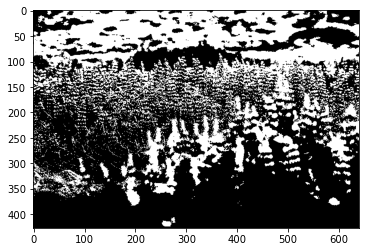

In [6]:
img = cv2.imread('a.jpg',0)

ret, thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)



plt.plot()
# plt.imshow(img,'gray')
plt.imshow(thresh1,'gray')
plt.show()

자동 이진화\
히스토그램으로 분석하여 배경과 객체의 중간 값 추출하여 임계값으로 설정\

cv2.THRESH_OTSU

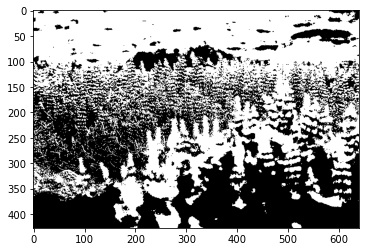

In [9]:
img = cv2.imread('a.jpg',0)
ret,thresh1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)
plt.imshow(thresh1, 'gray')
plt.show()

지역 이진화\
균일하지 않은 밝기 영상의 이진화\

==> 해결:\
이미지를 일정 크기의 사각형으로 분할하여 각 영역 내부의 픽셀 값\
분포에 맞게 임계값 결정하여 이진화

In [14]:
import sys 
import numpy as np
import cv2 

# 입력 영상 불러오기
src = cv2.imread('sudoku.jpg',cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()
    
# 전역 이진화 by Otsu's method
_, dst1 = cv2.threshold(src,0,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)

#지역 이진화 by Otsu's method
dst2 = np.zeros(src.shape, np.uint8)

bw = src.shape[1] //4
bh = src.shape[0] //4

for y in range(4):
    for x in range(4):
        src_ = src[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        dst_ = dst2[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        cv2.threshold(src_, 0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU,dst_)


cv2.imshow('src',src)
cv2.imshow('dst1',dst1)
cv2.imshow('dst2',dst2)
cv2.waitKey()
cv2.destroyAllWindows()

적응형 이진화\
cv2.adaptiveThreshold(src, maxVal, adaptiveMethod, thresholdType,blockSize,C,dst)=> dst(결과영상)\

maxVal: 임계값 함수 최대값(255)\
adaptiveMethod: 블록 평균 계산 방법, cv2.ADAPTIVE_THRESH_MEAN_C(산술평균) or , cv2.ADAPTIVE_THRESH_GAUSSIAN_C(가우시안 가중치 평균)\
thresholdType: 이진화방법, cv2.THRESH_BINARY, cv2.THRESH_INV\
blockSize: 블록크기 , 3이상의 홀수\
C:평균에서 뺄값.

In [17]:
import sys 
import numpy as np
import cv2 

src = cv2.imread('sudoku.jpg',cv2.IMREAD_GRAYSCALE)


def on_trackbar(pos):
    bsize=pos
    if bsize % 2 == 0:
        bsize = bsize-1
    if bsize <3:
        bsize=3
    
    dst = cv2.adaptiveThreshold(src,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY,bsize,5)
    
    cv2.imshow('dst',dst)

cv2.imshow('src',src)
cv2.namedWindow('dst')
cv2.createTrackbar('Block Size','dst',0,200,on_trackbar)
cv2.setTrackbarPos('Block Size','dst',11)

cv2.waitKey()
cv2.destroyAllWindows()




2. 모톨로지\
영상을 형태학적 측면에서 다루는 기법\
영상의 전처리나 후처리로 많이 사용됨\

1) 침식과 팽창\
침식: 커널이 객체 영역 안에 모두 포함될때 앵커(고정점)을 255로 설정\
객체 외각을 깎아내는 연산 => 객체 크기 감소, 배경 확대 효과\
=> 실제 영상에서의 작은 크기 잡음 제거 효과

cv2.erode(src, kernel, anchor, iterations, borderType, borderValue)=> dst\
kernel: None 3x3\
anchor: 고정점 위치. 기본값(-1,-1)은 정중앙점\
iterations:반복횟수, 기본값 1.\
borderType: 테두리 처리 종류\
borderValue:확장 테두리 채울값

팽창: 커널이 객체 영역 안에 하나라도 포함되면 앵커(고정점)을 255로 설정\
객체 외각을 확대시키는 연산=> 객체 크기 확대.배경 감소효과=>\
=> 실제 영상에서 내부 홀(구멍)을 채우는 효과

cv2.dilate(src,kernel,anchor,iterations,borderType,borderValue)=>dst\
kernel: None이면 3x3\
anchor:고정점 위치, 기본값(-1,-1)은 정중앙점\
iterations:반복횟수. 기본값1\
borderType:테두리 처리 종류\
borderValue: 확장 테두리 채울값

모톨로지 커널 생성\
cv2.getStructuringElement(shape, ksize, anchor) => res\
shape: 커널 모양\
cv2.MORpH_RECT: 사각형모양\
cv2.MORpH_CROSS: 십자가 모양\
cv2.MORpH_ELIIPSE: 사각형에 내접하는 타원\
ksize:커널 크기(가로,세로) 튜플\
anchor:앵커 위치(-1,-1)은 중앙점\
res: 0,1 로 구성된 행렬.

In [18]:
import sys 
import numpy as np
import cv2 

src = cv2.imread('circuit.bmp',cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()
    
se = cv2.getStructuringElement(cv2.MORPH_RECT,(5,3))
dst1 = cv2.erode(src,se)

dst2 = cv2.dilate(src,None)

cv2.imshow('src',src)
cv2.imshow('dst1',dst1)
cv2.imshow('dst2',dst2)
cv2.waitKey()
cv2.destroyAllWindows()

In [19]:
se

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

2) opening과 closing\
opening: erode 후 dilate\
closing: dilate 후 erode\


opening => 작은 개체나 돌기 제거. 얇은 선 끊어짐\
closing=> 작은 홈이나 홀 사라지고 얇은 연결선이 두꺼워짐.\
윤곽파악에 적합\

범용 모폴로지 연산 함수\
모폴로지 침식, 팽창 오프닝, 클로징 등의 연산을 하나의 함수로 실행가능\
cv2.morphologyEx(src,mode,kernel,anchor,iterations,borderType,borderValue)=> dst\
mode: 연산 종류\
cv2.MORPH_ERODE:침식\
cv2.MORPH_DILATE:팽창\
cv2.MORPH_OPEN:opening\
cv2.MORPH_CLOSE:closing\
cv2.MORPH_GRADIENT:dilate 결과 - erode 결과 (d와 e의차)

In [21]:
import sys 
import numpy as np
import cv2 

src = cv2.imread('rice.png',cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()
    
# src영상에 지역 이진화 수행
dst1 = np.zeros(src.shape, np.uint8)

bw = src.shape[1] // 4
bh = src.shape[0] // 4

for y in range(4):
    for x in range(4):
        src_ = src[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        dst_ = dst1[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        cv2.threshold(src_, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU, dst_)
        
cnt1, _ = cv2.connectedComponents(dst1)
print('cnt1:',cnt1)

dst2 = cv2.morphologyEx(dst1, cv2.MORPH_OPEN, None)

cnt2, _ = cv2.connectedComponents(dst2)
print('cnt2:',cnt2)

cv2.imshow('src',src)
cv2.imshow('dst1',dst1)
cv2.imshow('dst2',dst2)
cv2.waitKey()
cv2.destroyAllWindows()


cnt1: 113
cnt2: 99
